In [46]:
# 필요한 라이브러리 임포트
import requests
from lxml import html
from IPython.display import Image, display

# 실습 1. 대통령 프로필 사진과 약력 가져오기

[링크](https://www.president.go.kr/president/greeting) 여기서 대통령의 프로필과 약력을 알 수 있어요.

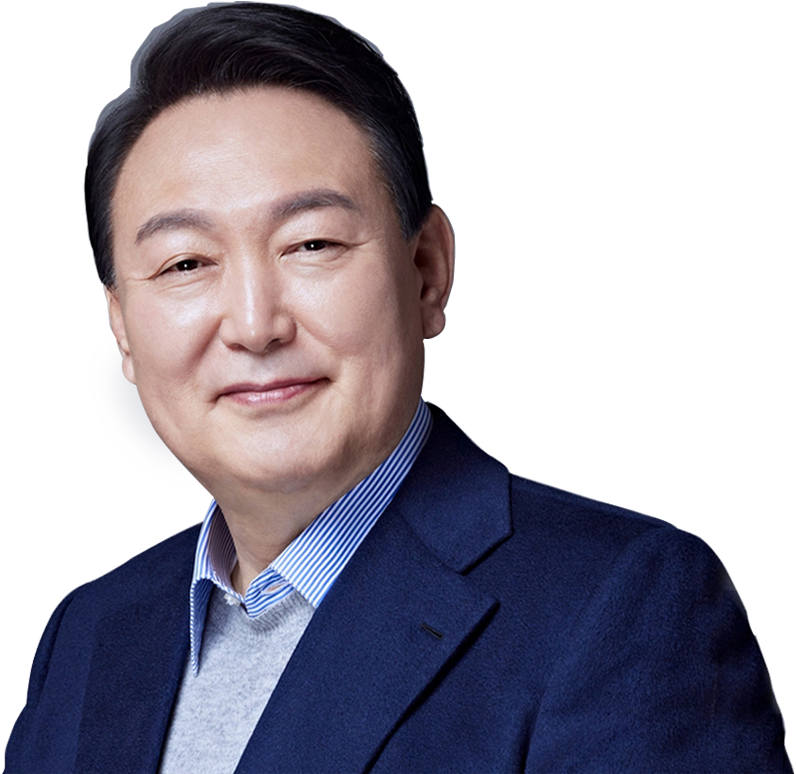

In [4]:
president_img_url = 'https://www.president.go.kr/assets/images/president/intro_president.png'
president_img = requests.get(president_img_url).content
display(Image(president_img))

## 잠깐!

`requests`의 `response` 표현 차이
 - `json`: json 양식으로 응답이 왔다면 `json()` 메소드 사용가능. json이 아닌 경우 에러 발생
 - `content`: binary로 보여줌.
 - `text` : 문자열 형식으로 보여줌.

## 대통령 프사 저장하기

In [5]:
with open('profile_image.jpg','wb') as f:
    f.write(president_img)

## 이번에는 약력을 가져와 보자
 - 개발자 도구를 열어서 아래 크롤링한 페이지와 비교해 봐요.

In [82]:
response = requests.get('https://www.president.go.kr/president/profile')



In [83]:
print(response.text)

<!DOCTYPE html>
<html lang="ko">
<head>
	<meta charset="utf-8">
	<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1" />
	<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no, maximum-scale=2, minimum-scale=1.0, viewport-fit=cover,minimal-ui">
	<meta name="theme-color" content="#00205C">
	<meta name="description" content="윤석열 대통령 프로필 페이지입니다."/>
	<meta name="keywords" content="프로필, 대한민국 대통령, 대한민국대통령, 윤석열, 윤석열 대통령, 제20대 대통령, 대통령실, 국민속으로 용산시대, 국민의 대통령, 윤대통령, 제20대 대통령 윤석열"/>
	<meta name="author" content="대한민국 대통령실"/>
	<meta name="format-detection" content="telephone=no"/>
	<meta name="robots" content="noarchive" />
	<meta property="og:type" content="website">
	<meta property="og:title" content="대한민국 대통령 &gt; 윤석열 대통령 &gt; 프로필">
	<meta property="og:url" content="https://www.president.go.kr/president/profile">
	<meta property="og:site_name" content="대한민국 대통령실">
	<meta property="og:description" content="윤석열 대통령 프로필 페이지입니다.">
	<meta property="og:image" 

In [84]:
president_profile = html.fromstring(response.text).xpath('//div[@class="historyWrap"]//text()')
president_profile

['\n\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t',
 '2022',
 '\n\n\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t',
 '2022. 05~',
 '\n\t\t\t\t\t\t\t\t\t',
 '제20대 대통령',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t',
 '2022. 03',
 '\n\t\t\t\t\t\t\t\t\t',
 '제20대 대통령 당선인',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t',
 '2021. 11',
 '\n\t\t\t\t\t\t\t\t\t',
 '제20대 대통령선거 국민의힘 대통령 후보',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t',
 '2021. 07',
 '\n\t\t\t\t\t\t\t\t\t',
 '제20대 대통령선거 예비후보',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t',
 '2010 ~ 2019',
 '\n\n\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t',
 '2019. 07 ~ 2021. 03',
 '\n\t\t\t\t\t\t\t\t\t',
 '대검찰청 검찰총장',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t\t\t',
 '2017. 05 ~ 2019. 07',
 '\n\t\t\t\t\t\t\t\t\t',
 '제59대 서울중앙지방검찰청 검사장',
 '\n\t\t\t\t\t\t\t\t',
 '\n\t\t\t\t\t\t\t

In [85]:
new_pp = []
for text in president_profile:
    if '\n' not in text:
        new_pp.append(text)
new_pp

['2022',
 '2022. 05~',
 '제20대 대통령',
 '2022. 03',
 '제20대 대통령 당선인',
 '2021. 11',
 '제20대 대통령선거 국민의힘 대통령 후보',
 '2021. 07',
 '제20대 대통령선거 예비후보',
 '2010 ~ 2019',
 '2019. 07 ~ 2021. 03',
 '대검찰청 검찰총장',
 '2017. 05 ~ 2019. 07',
 '제59대 서울중앙지방검찰청 검사장',
 '2016. 12 ~ 2017. 05',
 '최순실 등 국정농단 특별검사실 검사(파견)',
 '2016. 01 ~ 2016. 12',
 '대전고등검찰청 검사',
 '2014. 01 ~ 2016. 01',
 '대구고등검찰청 검사',
 '2013. 04 ~ 2014. 01',
 '수원지방검찰청 여주지청장',
 '2012. 07 ~ 2013. 04',
 '서울중앙지방검찰청 특별수사제 1부 부장검사',
 '2011. 09 ~ 2012. 07',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사1과장(겸임)',
 '2010. 08 ~ 2011. 09',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사2과장(겸임)',
 '2001 ~ 2009',
 '2009. 08 ~ 2010. 08',
 '대검찰청 범죄정보2담당관',
 '2009. 01 ~ 2009. 08',
 '대구지방검찰청 특별수사부 부장검사',
 '2008. 03 ~ 2009. 01',
 '대전지방검찰청 논산지청장',
 '2008. 01 ~ 2008. 03',
 '한나라당 대통령 후보 범죄 혐의 진상 규명 특별 검사실 검사(파견)',
 '2007. 03 ~ 2008. 01',
 '대검찰청 검찰연구관',
 '2005. 02 ~ 2007. 03',
 '의정부지방검찰청 고양지청 검사',
 '2003. 02 ~ 2005. 02',
 '광주지방검찰청 검사',
 '2002. 01 ~ 2003. 02',
 '법무법인(유) 태평양 변호사',
 '2001. 08 ~ 2002. 01',
 '부산지방검찰청 

In [88]:
new_new_pp = []
for text in new_pp:
    if '.' in text:
        new_new_pp.append(text)
    elif text[0] != '1' or text[0] != '2':
        new_new_pp.append(text)
        
new_new_pp

['2022',
 '2022. 05~',
 '제20대 대통령',
 '2022. 03',
 '제20대 대통령 당선인',
 '2021. 11',
 '제20대 대통령선거 국민의힘 대통령 후보',
 '2021. 07',
 '제20대 대통령선거 예비후보',
 '2010 ~ 2019',
 '2019. 07 ~ 2021. 03',
 '대검찰청 검찰총장',
 '2017. 05 ~ 2019. 07',
 '제59대 서울중앙지방검찰청 검사장',
 '2016. 12 ~ 2017. 05',
 '최순실 등 국정농단 특별검사실 검사(파견)',
 '2016. 01 ~ 2016. 12',
 '대전고등검찰청 검사',
 '2014. 01 ~ 2016. 01',
 '대구고등검찰청 검사',
 '2013. 04 ~ 2014. 01',
 '수원지방검찰청 여주지청장',
 '2012. 07 ~ 2013. 04',
 '서울중앙지방검찰청 특별수사제 1부 부장검사',
 '2011. 09 ~ 2012. 07',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사1과장(겸임)',
 '2010. 08 ~ 2011. 09',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사2과장(겸임)',
 '2001 ~ 2009',
 '2009. 08 ~ 2010. 08',
 '대검찰청 범죄정보2담당관',
 '2009. 01 ~ 2009. 08',
 '대구지방검찰청 특별수사부 부장검사',
 '2008. 03 ~ 2009. 01',
 '대전지방검찰청 논산지청장',
 '2008. 01 ~ 2008. 03',
 '한나라당 대통령 후보 범죄 혐의 진상 규명 특별 검사실 검사(파견)',
 '2007. 03 ~ 2008. 01',
 '대검찰청 검찰연구관',
 '2005. 02 ~ 2007. 03',
 '의정부지방검찰청 고양지청 검사',
 '2003. 02 ~ 2005. 02',
 '광주지방검찰청 검사',
 '2002. 01 ~ 2003. 02',
 '법무법인(유) 태평양 변호사',
 '2001. 08 ~ 2002. 01',
 '부산지방검찰청 

## 내가 원하는 요소만 선택하는 방법

1. 열심히 배운 xpath 문법을 적극 활용한다.
2. 개발자 도구를 적극 이용한다.
    - 개발자 도구에서 내가 가져오기를 원하는 요소를 Elements 탭에서 선택하기


### 문제 1. 약력 문자열 다듬기
#### 지금까지 갈고 닦은 파이썬을 바탕으로 대통령의 약력을 깔끔한 형태로 만들어 보세요.

In [64]:
import re
import datetime
import pandas as pd

In [58]:
[i for i in president_profile if '\n' not in i]

['2022',
 '2022. 05~',
 '제20대 대통령',
 '2022. 03',
 '제20대 대통령 당선인',
 '2021. 11',
 '제20대 대통령선거 국민의힘 대통령 후보',
 '2021. 07',
 '제20대 대통령선거 예비후보',
 '2010 ~ 2019',
 '2019. 07 ~ 2021. 03',
 '대검찰청 검찰총장',
 '2017. 05 ~ 2019. 07',
 '제59대 서울중앙지방검찰청 검사장',
 '2016. 12 ~ 2017. 05',
 '최순실 등 국정농단 특별검사실 검사(파견)',
 '2016. 01 ~ 2016. 12',
 '대전고등검찰청 검사',
 '2014. 01 ~ 2016. 01',
 '대구고등검찰청 검사',
 '2013. 04 ~ 2014. 01',
 '수원지방검찰청 여주지청장',
 '2012. 07 ~ 2013. 04',
 '서울중앙지방검찰청 특별수사제 1부 부장검사',
 '2011. 09 ~ 2012. 07',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사1과장(겸임)',
 '2010. 08 ~ 2011. 09',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사2과장(겸임)',
 '2001 ~ 2009',
 '2009. 08 ~ 2010. 08',
 '대검찰청 범죄정보2담당관',
 '2009. 01 ~ 2009. 08',
 '대구지방검찰청 특별수사부 부장검사',
 '2008. 03 ~ 2009. 01',
 '대전지방검찰청 논산지청장',
 '2008. 01 ~ 2008. 03',
 '한나라당 대통령 후보 범죄 혐의 진상 규명 특별 검사실 검사(파견)',
 '2007. 03 ~ 2008. 01',
 '대검찰청 검찰연구관',
 '2005. 02 ~ 2007. 03',
 '의정부지방검찰청 고양지청 검사',
 '2003. 02 ~ 2005. 02',
 '광주지방검찰청 검사',
 '2002. 01 ~ 2003. 02',
 '법무법인(유) 태평양 변호사',
 '2001. 08 ~ 2002. 01',
 '부산지방검찰청 

In [59]:

pp_list = []
for text in president_profile:
    if '\n' in text or re.match(r"\d{4} ~ \d{4}",text)  or re.match(r"^\d{4}$",text):
        continue
    pp_list.append(text)
pp_list

['2022. 05~',
 '제20대 대통령',
 '2022. 03',
 '제20대 대통령 당선인',
 '2021. 11',
 '제20대 대통령선거 국민의힘 대통령 후보',
 '2021. 07',
 '제20대 대통령선거 예비후보',
 '2019. 07 ~ 2021. 03',
 '대검찰청 검찰총장',
 '2017. 05 ~ 2019. 07',
 '제59대 서울중앙지방검찰청 검사장',
 '2016. 12 ~ 2017. 05',
 '최순실 등 국정농단 특별검사실 검사(파견)',
 '2016. 01 ~ 2016. 12',
 '대전고등검찰청 검사',
 '2014. 01 ~ 2016. 01',
 '대구고등검찰청 검사',
 '2013. 04 ~ 2014. 01',
 '수원지방검찰청 여주지청장',
 '2012. 07 ~ 2013. 04',
 '서울중앙지방검찰청 특별수사제 1부 부장검사',
 '2011. 09 ~ 2012. 07',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사1과장(겸임)',
 '2010. 08 ~ 2011. 09',
 '서울중앙지방검찰청 부장검사, 대검찰청 중앙수사2과장(겸임)',
 '2009. 08 ~ 2010. 08',
 '대검찰청 범죄정보2담당관',
 '2009. 01 ~ 2009. 08',
 '대구지방검찰청 특별수사부 부장검사',
 '2008. 03 ~ 2009. 01',
 '대전지방검찰청 논산지청장',
 '2008. 01 ~ 2008. 03',
 '한나라당 대통령 후보 범죄 혐의 진상 규명 특별 검사실 검사(파견)',
 '2007. 03 ~ 2008. 01',
 '대검찰청 검찰연구관',
 '2005. 02 ~ 2007. 03',
 '의정부지방검찰청 고양지청 검사',
 '2003. 02 ~ 2005. 02',
 '광주지방검찰청 검사',
 '2002. 01 ~ 2003. 02',
 '법무법인(유) 태평양 변호사',
 '2001. 08 ~ 2002. 01',
 '부산지방검찰청 검사',
 '1999. 03 ~ 2001. 08',
 '서울지방검찰청 검사

In [63]:
president_df = []
for idx, text in enumerate(pp_list):
    if re.match(r'^[가-힣]',text):
            continue
    else:
        date = [i for i in text.split("~")]
        date = [i.strip(' ') for i in date if i !='']
        position = pp_list[idx+1]
        
        if len(date) == 1 :
            try:
                president_df.append({"start":datetime.datetime.strptime(date[0],'%Y. %m'), "position":position})
            except:
                president_df.append({"start":datetime.datetime.strptime(date[0],'%Y.'), "position":position})
        else:
            president_df.append({"start":datetime.datetime.strptime(date[0],'%Y. %m'), "position":position, "end":datetime.datetime.strptime(date[1],'%Y. %m')})

president_df = pd.DataFrame(president_df)
president_df[['start','end','position']]

['2022. 05'] 제20대 대통령
['2022. 03'] 제20대 대통령 당선인
['2021. 11'] 제20대 대통령선거 국민의힘 대통령 후보
['2021. 07'] 제20대 대통령선거 예비후보
['2019. 07', '2021. 03'] 대검찰청 검찰총장
['2017. 05', '2019. 07'] 제59대 서울중앙지방검찰청 검사장
['2016. 12', '2017. 05'] 최순실 등 국정농단 특별검사실 검사(파견)
['2016. 01', '2016. 12'] 대전고등검찰청 검사
['2014. 01', '2016. 01'] 대구고등검찰청 검사
['2013. 04', '2014. 01'] 수원지방검찰청 여주지청장
['2012. 07', '2013. 04'] 서울중앙지방검찰청 특별수사제 1부 부장검사
['2011. 09', '2012. 07'] 서울중앙지방검찰청 부장검사, 대검찰청 중앙수사1과장(겸임)
['2010. 08', '2011. 09'] 서울중앙지방검찰청 부장검사, 대검찰청 중앙수사2과장(겸임)
['2009. 08', '2010. 08'] 대검찰청 범죄정보2담당관
['2009. 01', '2009. 08'] 대구지방검찰청 특별수사부 부장검사
['2008. 03', '2009. 01'] 대전지방검찰청 논산지청장
['2008. 01', '2008. 03'] 한나라당 대통령 후보 범죄 혐의 진상 규명 특별 검사실 검사(파견)
['2007. 03', '2008. 01'] 대검찰청 검찰연구관
['2005. 02', '2007. 03'] 의정부지방검찰청 고양지청 검사
['2003. 02', '2005. 02'] 광주지방검찰청 검사
['2002. 01', '2003. 02'] 법무법인(유) 태평양 변호사
['2001. 08', '2002. 01'] 부산지방검찰청 검사
['1999. 03', '2001. 08'] 서울지방검찰청 검사
['1997. 03', '1999. 02'] 수원지방검찰청 성남지청 검사
['1996. 03', '1997. 02'] 춘천지방검

,start,end,position
0,2022-05-01,NaT,제20대 대통령
1,2022-03-01,NaT,제20대 대통령 당선인
2,2021-11-01,NaT,제20대 대통령선거 국민의힘 대통령 후보
3,2021-07-01,NaT,제20대 대통령선거 예비후보
4,2019-07-01,2021-03-01,대검찰청 검찰총장
5,2017-05-01,2019-07-01,제59대 서울중앙지방검찰청 검사장
6,2016-12-01,2017-05-01,최순실 등 국정농단 특별검사실 검사(파견)
7,2016-01-01,2016-12-01,대전고등검찰청 검사
8,2014-01-01,2016-01-01,대구고등검찰청 검사
9,2013-04-01,2014-01-01,수원지방검찰청 여주지청장


### 문제 2. 약력을 데이터 프레임으로 만들기
 - `start`, `end`, `position` 3개의 column을 만들어 약력을 데이터 프레임으로 만들어 `president_df`에 저장해 보세요.

In [ ]:
president_df # YOUR CODE HERE.

### 문제 3. 데이터 프레임 CSV로 저장하기
 - 데이터 프레임을 csv 파일로 만들어 `president_profile.csv`로 저장하세요. 단, index가 있으면 안됩니다.

In [65]:
president_df.to_csv("president_profile.csv", index=False)

## 실습2. 내가 좋아하는 웹툰을 파일로 저장해보자.

### 이미지 파일들 주소 가져오기: GET 방식이 쓰였음을 기억하기
### 문제 4. 웹툰 이미지의 경로 xpath 추출해 내기

In [ ]:
webtoon_url = 'https://comic.naver.com/webtoon/detail?titleId=478261&no=87&week=thu'
webtoon_page = requests.get(webtoon_url).text
# print(webtoon_page)
webtoon_xpath = "//img[@alt='comic content']/@src" # xpath 표현식을 입력하세요.
image_list = html.fromstring(webtoon_page).xpath(webtoon_xpath)
image_list

In [76]:
for img_url in image_list:
    response = requests.get(img_url)
    print(response)
    break

<Response [403]>


## Response가 4로 시작하면, 실패했다는 뜻입니다. 특히 403 에러는 서버에서 접근을 금지시켜 놓은 것입니다.
 - 네이버에서 Yeti만을 크롤링을 허락했다는 사실을 기억해 내세요.
 - 링크: https://searchadvisor.naver.com/guide/seo-basic-firewall

### 문제 5. 대통령 프로필 이미지를 저장했던 것을 기억하고 내가 좋아하는 웹툰 이미지들을 저장해 보세요.

In [80]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebit/53.7.36 (KHTML, like Gecko) Chrome/63.0.3239.0 Safari/537.36 (compatible; Yeti/1.1; +https://naver.me/spd)',
}
for idx, img_url in enumerate(image_list):
    response = requests.get(img_url, headers=headers).content
    with open(f"webtoon/{idx}.jpg",'wb') as f:
        f.write(response)


## 실습 3. 쿠팡 장바구니에 물건 마구마구 담기
 - 쿠팡에 먼저 로그인 해 두세요.
 - 다음 삼다수 구매 링크로 이동하세요. 링크: https://www.coupang.com/vp/products/7666070794?itemId=16569434481&vendorItemId=86478559145&pickType=COU_PICK&q=%EC%82%BC%EB%8B%A4%EC%88%98&itemsCount=33&searchId=1319c79bbcee464184111c4f44edef46&rank=0&isAddedCart=
 - 장바구니에 물건 담을 때 보내는 요청 curl로 가로채기

1. 다음 사이트에 이동해서 방금 복사한 내용을 붙여 넣으세요.
 - 링크: https://curlconverter.com/python/
2. Postman을 이용해서 방금 복사한 내용을 붙여 놓고 리퀘스트 해보세요.

### POST 방식이 쓰였음을 꼭 기억하세요.